# **Data Diri**


*   NIM = 2241720056
*   Nama = Dhika Wahyu Nugroho
*   Kelas = 3F
*   No Absen = 06




# **Praktikum 1**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



## **Penerappan Fitting SVM**



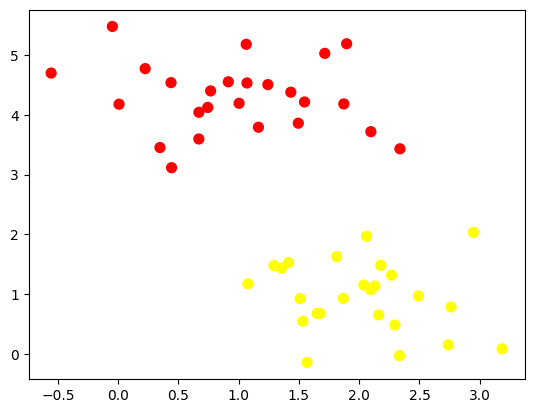

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

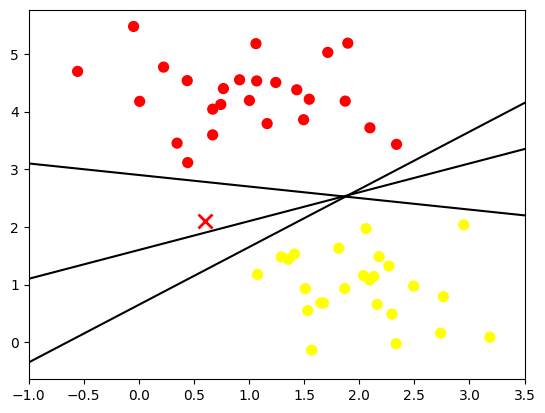

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

(-1.0, 3.5)

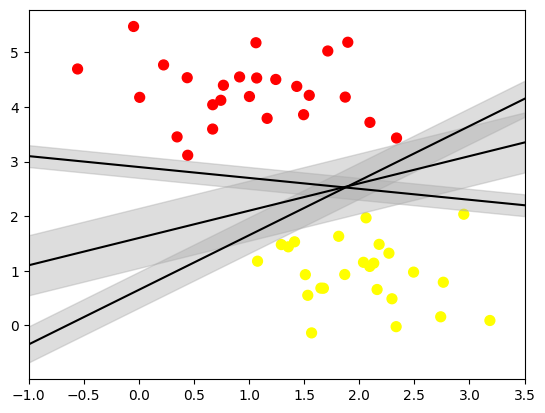

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

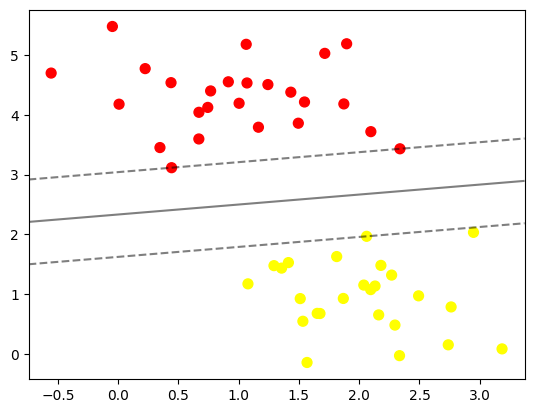

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

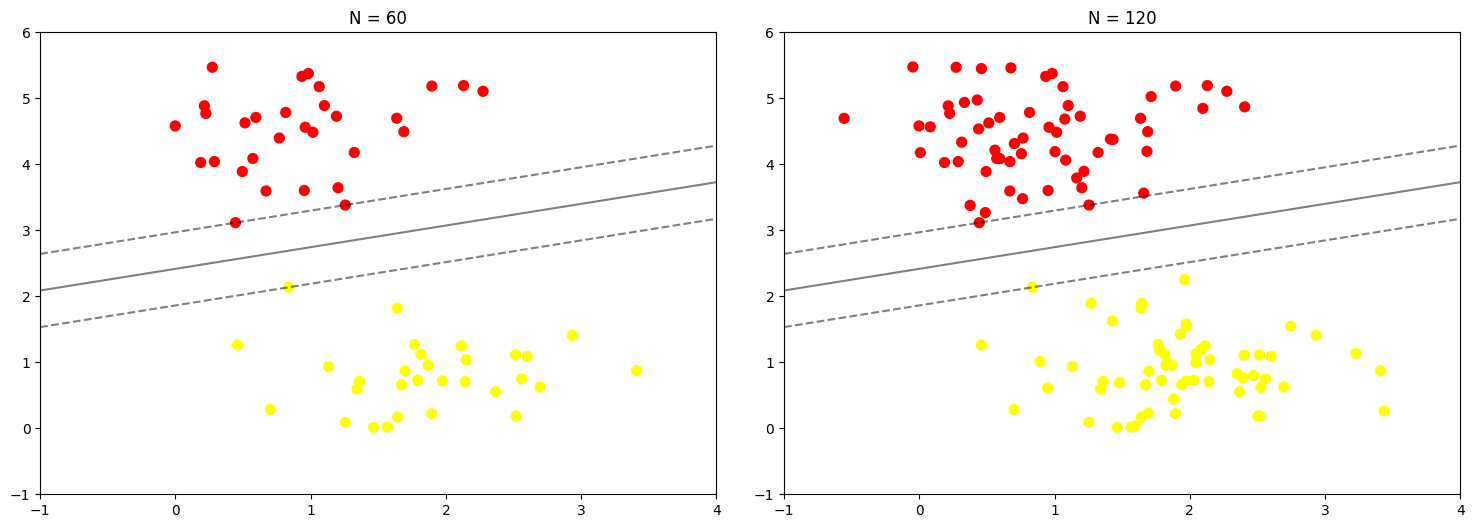

In [ ]:
def plot_svm(N=10, ax=None):
  X,y = make_blobs(n_samples=200, centers=2,
                   random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))




## **Data Tidak Terpisah Secara Linier**



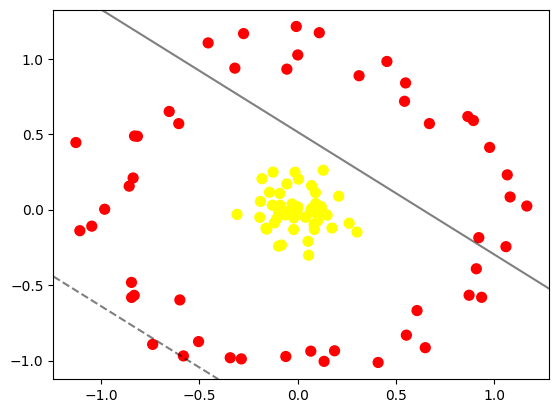

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-5.80839244e-01, -9.69051646e-01],
       [-1.05746888e-01, -6.03197215e-02],
       [-3.08009612e-01, -3.14180506e-02],
       [ 9.26928590e-02,  4.11306610e-02],
       [-7.37034060e-01, -8.92756199e-01],
       [-1.72843234e-02,  3.89451068e-03],
       [-9.81129309e-01,  2.78280819e-03],
       [ 8.94344077e-01,  5.90298655e-01],
       [ 6.73291161e-02, -9.37541833e-01],
       [-8.29295694e-01,  4.87759910e-01],
       [ 9.36167446e-01, -5.80852251e-01],
       [ 3.12845582e-01,  8.87062283e-01],
       [-1.42778906e-01,  1.15305034e-01],
       [-6.52863703e-01,  6.50309283e-01],
       [ 7.08993029e-02,  7.20328119e-03],
       [ 1.29623596e-01, -1.63090905e-02],
       [ 9.21861873e-01, -1.85602202e-01],
       [-1.60861352e-01, -1.23105833e-01],
       [-8.44816050e-01, -4.82045814e-01],
       [ 7.08579771e-02,  1.59039628e-01],
       [ 6.49567056e-01, -9.14557978e-01],
       [-8.36469652e-01,  2.09811713e-01],
       [-1.97325570e-02, -5.49024480e-02],
       [ 1.01529432e-01, -7.43013341e-02],
       [ 1.00810343e-01, -3.26974371e-02],
       [-1.28312559e-01,  2.93541461e-02],
       [-1.10745127e+00, -1.39474586e-01],
       [-6.04311425e-01,  5.69926152e-01],
       [-5.97508536e-02, -9.72829268e-01],
       [ 1.88146467e-01, -9.35177394e-01],
       [ 1.14466888e-03,  1.02497395e+00],
       [-2.74714743e-01,  1.16628470e+00],
       [ 5.31164260e-02, -2.09921787e-01],
       [-1.81007067e-01,  2.04987383e-01],
       [ 6.70587691e-01,  5.70054662e-01],
       [-1.12750291e+00,  4.44622417e-01],
       [-5.46397660e-02,  1.70183574e-01],
       [ 5.49409796e-01,  8.39388743e-01],
       [-8.14536959e-01,  4.85974086e-01],
       [ 1.18471326e-01, -1.50192095e-02],
       [ 8.54153111e-02, -1.31493401e-01],
       [-6.33646457e-02, -3.45942375e-02],
       [ 2.62550881e-01, -8.99584909e-02],
       [ 1.08110919e+00,  8.39857285e-02],
       [-6.60120735e-03,  1.21345451e+00],
       [-1.18030330e-01, -8.77465190e-02],
       [-1.24824699e-01,  2.48478329e-01],
       [ 5.44164366e-01,  7.17825121e-01],
       [ 1.20197625e-01,  1.91860517e-02],
       [ 8.72527757e-01, -5.67131212e-01],
       [ 1.09568469e-01, -2.41615112e-02],
       [-5.03546691e-01, -8.74203489e-01],
       [-8.56433696e-01,  1.55566584e-01],
       [ 1.30167561e-01,  2.61108254e-01],
       [-8.21289807e-02, -2.34539419e-01],
       [ 8.33894048e-02, -9.67235538e-02],
       [ 9.06935760e-02,  1.13030631e-01],
       [ 1.50225283e-01, -3.65325657e-02],
       [-1.99951373e-02, -1.31439937e-01],
       [-1.56998077e-01, -1.29499396e-01],
       [ 5.53437599e-01, -8.31564025e-01],
       [-8.44137677e-01, -5.81667921e-01],
       [-9.57337913e-02, -2.08141971e-02],
       [-2.86153396e-01, -9.88725537e-01],
       [ 6.07634710e-01, -6.68642809e-01],
       [-9.03305232e-02,  1.07120292e-01],
       [ 1.05995478e+00, -2.45347130e-01],
       [ 1.34912520e-01, -1.00518436e+00],
       [-8.88618497e-02,  2.91609103e-02],
       [ 4.09746025e-01, -1.01256180e+00],
       [-9.66771158e-02, -2.42028356e-01],
       [-3.14531621e-03, -7.79925039e-03],
       [-1.29183786e-02,  2.47947718e-01],
       [ 4.82722901e-03,  2.02056928e-01],
       [-6.28904263e-02, -1.26760414e-02],
       [-4.54815194e-01,  1.10473115e+00],
       [ 9.77075423e-01,  4.12292861e-01],
       [ 5.63456135e-02, -3.02192137e-01],
       [ 8.66064349e-01,  6.17018377e-01],
       [-8.30846048e-01, -5.67894866e-01],
       [ 3.02034567e-01, -1.48320447e-01],
       [-5.44393232e-02,  9.30750869e-01],
       [ 1.24859279e-03,  1.80034088e-02],
       [ 1.16598354e+00,  2.38823053e-02],
       [ 3.98804010e-02, -5.02580625e-02],
       [ 2.09323934e-01,  8.89326226e-02],
       [-2.80414563e-02,  3.79351124e-02],
       [-5.98711397e-01, -5.98157562e-01],
       [ 1.10416180e-01,  1.17226746e+00],
       [-1.04669854e+00, -1.09462078e-01],
       [ 4.54380948e-01,  9.81607507e-01],
       [ 6.59231219e-02, -1.40790158e-02

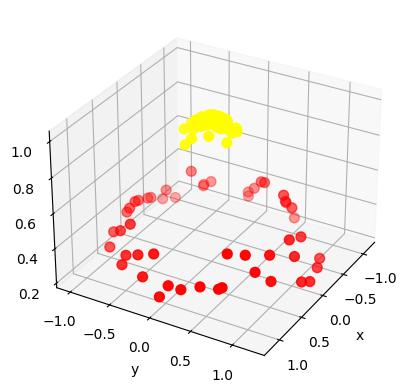

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

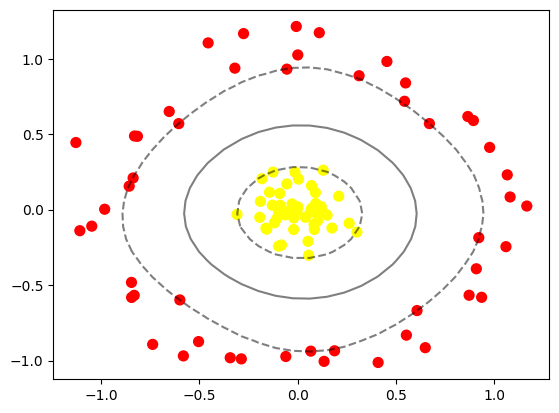

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')



## **Data Overlap**



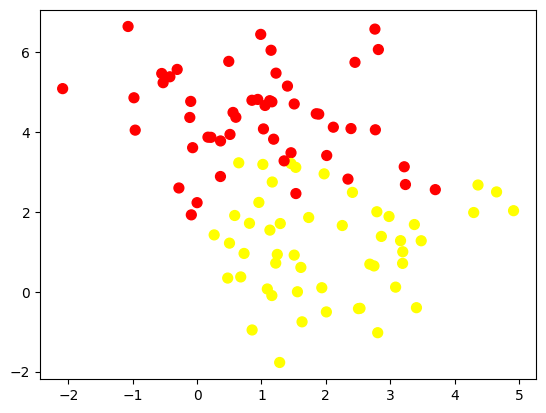

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

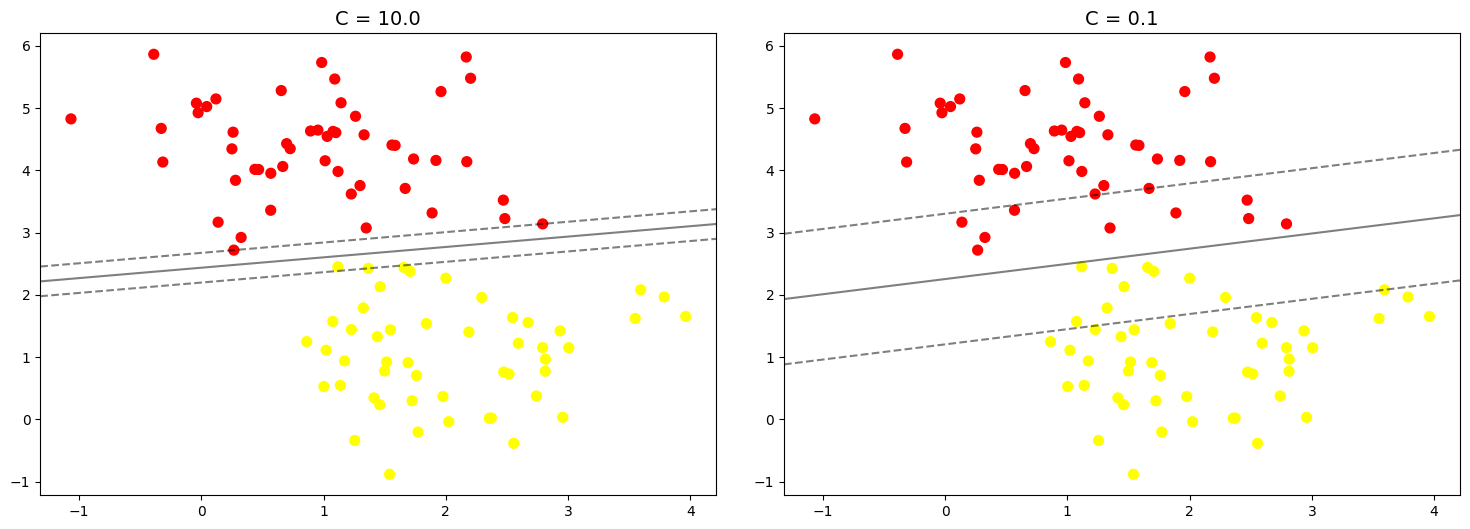

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Praktikum 2**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


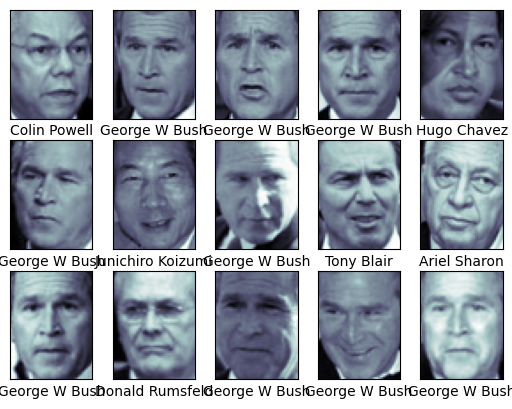

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 38s, sys: 26.7 s, total: 2min 5s
Wall time: 1min 19s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

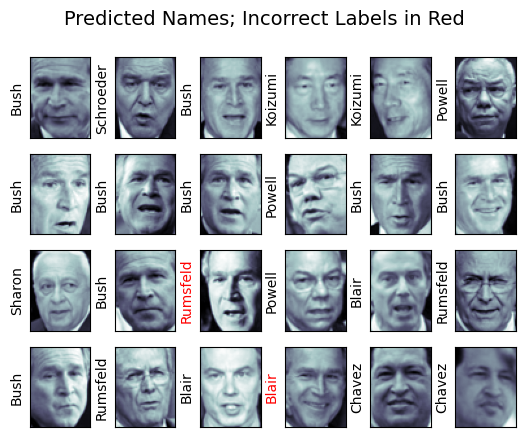

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Text(113.92222222222219, 0.5, 'predicted label')

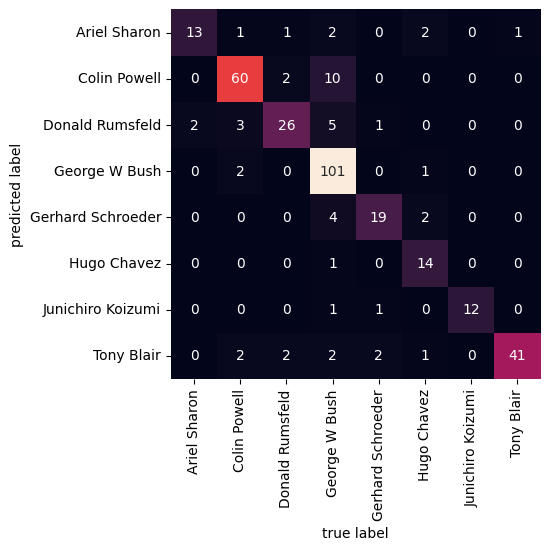

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Praktikum 5**



## **Langkah 1 - Import Library**



In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Machine_Learning/Jobsheet 4/images/test"
test_dir = "/content/drive/MyDrive/Machine_Learning/Jobsheet 4/images/training"



## **Langkah 2 - Load Data dan Visualisasikan**



In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[24, 21, 14],
         [20, 17, 10],
         [16, 13,  6],
         ...,
         [11,  9,  0],
         [15, 13,  1],
         [18, 16,  4]],
 
        [[55, 52, 45],
         [52, 49, 42],
         [51, 48, 41],
         ...,
         [31, 29, 17],
         [33, 31, 19],
         [34, 32, 20]],
 
        [[52, 49, 42],
         [51, 48, 41],
         [52, 49, 42],
         ...,
         [39, 37, 25],
         [39, 37, 25],
         [39, 37, 25]],
 
        ...,
 
        [[75, 81, 69],
         [76, 82, 70],
         [76, 82, 70],
         ...,
         [46, 60, 63],
         [45, 60, 63],
         [45, 60, 63]],
 
        [[78, 81, 70],
         [77, 83, 71],
         [81, 84, 73],
         ...,
         [41, 55, 56],
         [43, 57, 60],
         [43, 59, 59]],
 
        [[78, 79, 71],
         [82, 85, 76],
         [88, 89, 81],
         ...,
         [39, 51, 51],
         [43, 54, 56],
         [44, 58, 58]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 131
(591, 800, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (458, 800, 3)
Label	: night


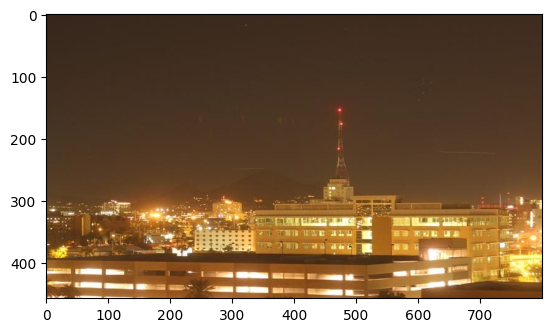

In [ ]:
random_img_viz(train_img)



## **Langkah 3 - Pra Pengolahan Data**



In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 94
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


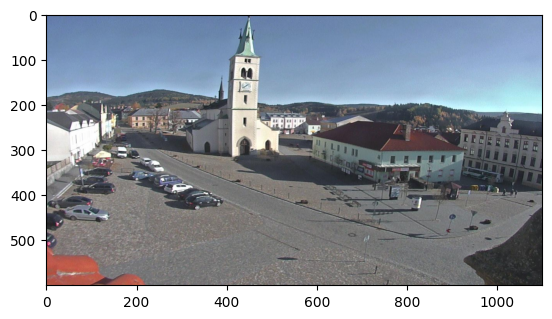

In [ ]:
random_img_viz(train_std_img_list)



## **Langkah 4 - Ekstraksi Fitur**



In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 38
Avg Brighness: 89.0185


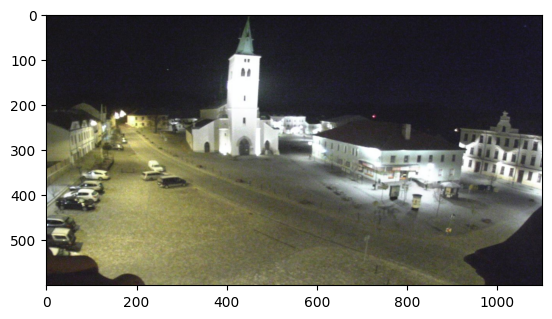

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)



## **Langkah 5 - Klasifikasi dengan Metode Threshold**



In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 136
Actual label: 1
Predicted label: 0


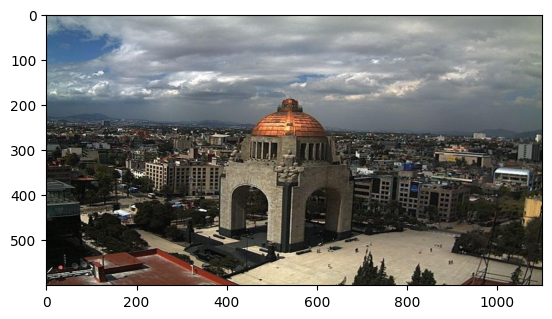

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])



## **Langkah 6 - Evaluasi (Manual)**



In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8688


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8417




## **Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**





## **Langkah 4 alternatif - Membuat Feature Vectors**



In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,86.269774,0.0
1,14.008245,0.0
2,21.846441,0.0
3,88.064115,0.0
4,108.228476,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,88.409871,0.0
1,13.972930,0.0
2,13.750727,0.0
3,102.748306,0.0
4,103.096279,0.0




## **Langkah 5 alternatif**



In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()



## **Langkah 6 alternatif**



In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.925
Accuracy on test: 0.9083333333333333
